## Introduction

### Simple Linear Regression vs Linear SVR
![](images/sv2.jpg)
#### We discard error of the points within the `epsilon insensitive tube` and only worry about those outside this tube.
#### We need to do feature scaling for SVR

### Linear SVR Intuition
![](images/sv3.jpg)

The points outside tube are the support vectors that from the structure of the `epsilon insensitive tube`.

## Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Importing the data

In [2]:
data = pd.read_csv('data/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Feature Scaling
* Feature scaling is essential for SVR for both the X and y data.  
* This is because the SVR model has an implicit equation that includes both X and y within its mathematical implementation.

In [8]:
# Reshaping the ground truth data into a 9x1 2D array because the standard scaler expects a 2D array
y = y.reshape(len(y),1)

In [9]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [12]:
from sklearn.preprocessing import StandardScaler

scX = StandardScaler()
scY = StandardScaler()

X = scX.fit_transform(X)
y = scY.fit_transform(y)

In [13]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [14]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training an SVR Model on the entire dataset

In [15]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf') # We use a non-linear SVR kernel here
svr.fit(X, y)

/Users/JJ/Desktop/MLProjects/MLA2Z/env/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [16]:
scY.inverse_transform(svr.predict(scX.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

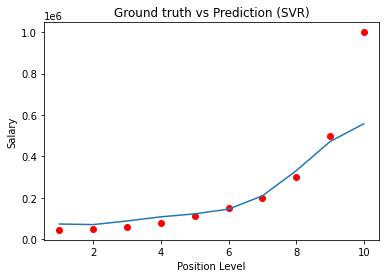

In [18]:
plt.scatter(scX.inverse_transform(X), scY.inverse_transform(y), color = 'red')
plt.plot(scX.inverse_transform(X), scY.inverse_transform(svr.predict(X)))
plt.title('Ground truth vs Prediction (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show();

## Visualising the SVR results (for higher resolution and smoother curve)

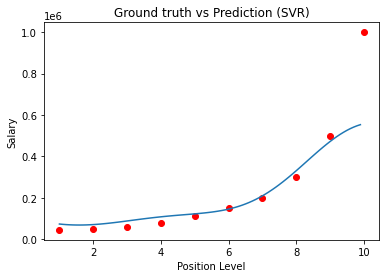

In [20]:
X_grid = np.arange(min(scX.inverse_transform(X)), max(scX.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scX.inverse_transform(X), scY.inverse_transform(y), color = 'red')
plt.plot(X_grid, scY.inverse_transform(svr.predict(scX.transform(X_grid))))
plt.title('Ground truth vs Prediction (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show();

**SVR does not handle outliers that well**